In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from collections import defaultdict
from sentence_transformers.losses import CosineSimilarityLoss
from CFFit import CFFitST, ClassificationHead

In [ ]:
BASE_MODEL = "all-mpnet-base-v2"
RANDOM_SEED = 23
OUTPUT_PATH = 'output'

import torch

device_num = 3
DEVICE = "cuda:"+str(device_num)
torch.cuda.set_device(device_num)
DEVICE = DEVICE if torch.cuda.is_available() else "cpu"

In [ ]:
train_set = pd.read_csv("data/issues_train.csv")
test_set = pd.read_csv("data/issues_test.csv")

In [ ]:
repos = list(set(train_set["repo"].unique()))
print(repos)

In [ ]:
train_set.groupby(["repo", "label"]).size().unstack(fill_value=0)

In [ ]:
from keras.utils import to_categorical

def process_dataset(df):
    
    for i, row in df.iterrows():
        #print(row)
        df.at[i,'text'] = str(row['title']) + " " + str(row['body'])
    df = df[['text', 'label', 'repo']]
    return df
    
train_set, test_set = process_dataset(train_set), process_dataset(test_set)

dic_labels = {"feature":0,"bug":1,"question":2}
def get_labels(data_set):
    labels = data_set["label"]
    return to_categorical([ dic_labels[label] for i, label in labels.items()], num_classes=3)



def get_x_y(df):
    x = df["text"].to_list()
    y = get_labels(df)
    return x, y 

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

dic_labels = {"feature":0,"bug":1,"question":2}
def class_report(y_true, y_pred, name_repo):
  
  # Convert the predicted probabilities to class labels
  y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming a one-hot encoded target variable

  # Convert the true labels to class labels (if needed)
  y_true_classes = np.argmax(y_true, axis=1)  # Replace 'y_true' with your true labels

  # Generate the classification report
  report = classification_report(y_true_classes, y_pred_classes)
  print(name_repo)
  print(report)
  # Calcular la matriz de confusión
  matriz_confusion = confusion_matrix(y_true_classes, y_pred_classes)

  # Crear un heatmap de la matriz de confusión
  plt.figure(figsize=(4, 3))
  sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
              xticklabels=list(dic_labels.keys()), yticklabels=list(dic_labels.keys()))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(name_repo)
  plt.show()
  return classification_report(y_true_classes, y_pred_classes, output_dict=True, digits=4)

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}}
Iteration 0
bug feature st_pos 0 size 2833.3333333333335 end_pos 2833.3333333333335
bug question st_pos 0 size 2833.3333333333335 end_pos 2833.3333333333335
feature question st_pos 0 size 2833.3333333333335 end_pos 2833.3333333333335
bug bug st_pos 0 size 2805.0 end_pos 2805.0
feature feature st_pos 0 size 2805.0 end_pos 2805.0
question question st_pos 0 size 2805.0 end_pos 2805.0


/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Validate data  ('bug', 'feature') l 0 s: 1000 
[==========] 992 1000 0.992
Validate data  ('bug', 'question') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('feature', 'question') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('bug', 'bug') l 1 s: 990 
[==========] 989 990 0.998989898989899
Validate data  ('feature', 'feature') l 1 s: 990 
[==========] 978 990 0.9878787878787879
Validate data  ('question', 'question') l 1 s: 990 
[==========] 864 990 0.8727272727272727
accuracy {('bug', 'feature'): 0.992, ('bug', 'question'): 1.0, ('feature', 'question'): 1.0, ('bug', 'bug'): 0.998989898989899, ('feature', 'feature'): 0.9878787878787879, ('question', 'question'): 0.8727272727272727}
new_pos {} 

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}, 0: {'bug_feature': 0.99

/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Validate data  ('bug', 'feature') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('bug', 'question') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('feature', 'question') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('bug', 'bug') l 1 s: 990 
[==========] 990 990 1.0
Validate data  ('feature', 'feature') l 1 s: 990 
[==========] 990 990 1.0
Validate data  ('question', 'question') l 1 s: 990 
[==========] 990 990 1.0
accuracy {('bug', 'feature'): 1.0, ('bug', 'question'): 1.0, ('feature', 'question'): 1.0, ('bug', 'bug'): 1.0, ('feature', 'feature'): 1.0, ('question', 'question'): 1.0}
new_pos {} 

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}, 0: {'bug_feature': 0.992, 'bug_question': 1.0, 'feature_question': 1.0, 'bug_bug': 0.998989898989899, 'feature_fea

/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Validate data  ('bug', 'feature') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('bug', 'question') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('feature', 'question') l 0 s: 1000 
[==========] 1000 1000 1.0
Validate data  ('bug', 'bug') l 1 s: 990 
[==========] 990 990 1.0
Validate data  ('feature', 'feature') l 1 s: 990 
[==========] 990 990 1.0
Validate data  ('question', 'question') l 1 s: 990 
[==========] 990 990 1.0
accuracy {('bug', 'feature'): 1.0, ('bug', 'question'): 1.0, ('feature', 'question'): 1.0, ('bug', 'bug'): 1.0, ('feature', 'feature'): 1.0, ('question', 'question'): 1.0}
new_pos {} 

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}, 0: {'bug_feature': 0.992, 'bug_question': 1.0, 'feature_question': 1.0, 'bug_bug': 0.998989898989899, 'feature_fea

Epoch 1: 100%|██████████| 18/18 [00:03<00:00,  4.85batch/s]


facebook/react
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.92      0.96      0.94       100
           2       0.87      0.68      0.76       100

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



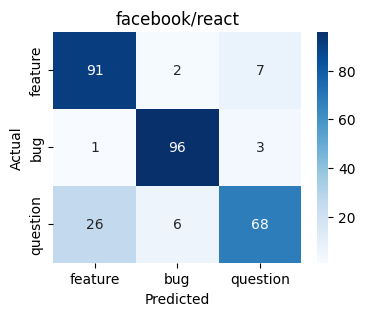

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}}
Iteration 0
bug feature st_pos 0 size 2833.3333333333335 end_pos 2833.3333333333335
bug question st_pos 0 size 2833.3333333333335 end_pos 2833.3333333333335
feature question st_pos 0 size 2833.3333333333335 end_pos 2833.3333333333335
bug bug st_pos 0 size 2805.0 end_pos 2805.0
feature feature st_pos 0 size 2805.0 end_pos 2805.0
question question st_pos 0 size 2805.0 end_pos 2805.0


/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Validate data  ('bug', 'feature') l 0 s: 1000 
[==========] 983 1000 0.983
Validate data  ('bug', 'question') l 0 s: 1000 
[==========] 899 1000 0.899
Validate data  ('feature', 'question') l 0 s: 1000 
[==========] 978 1000 0.978
Validate data  ('bug', 'bug') l 1 s: 990 
[==========] 719 990 0.7262626262626263
Validate data  ('feature', 'feature') l 1 s: 990 
[==========] 877 990 0.8858585858585859
Validate data  ('question', 'question') l 1 s: 990 
[==========] 831 990 0.8393939393939394
accuracy {('bug', 'feature'): 0.983, ('bug', 'question'): 0.899, ('feature', 'question'): 0.978, ('bug', 'bug'): 0.7262626262626263, ('feature', 'feature'): 0.8858585858585859, ('question', 'question'): 0.8393939393939394}
new_pos {} 

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}, 0: {'bug_featur

/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Validate data  ('bug', 'feature') l 0 s: 1000 
[==========] 974 1000 0.974
Validate data  ('bug', 'question') l 0 s: 1000 
[==========] 984 1000 0.984
Validate data  ('feature', 'question') l 0 s: 1000 
[==========] 989 1000 0.989
Validate data  ('bug', 'bug') l 1 s: 990 
[==========] 989 990 0.998989898989899
Validate data  ('feature', 'feature') l 1 s: 990 
[==========] 963 990 0.9727272727272728
Validate data  ('question', 'question') l 1 s: 990 
[==========] 990 990 1.0
accuracy {('bug', 'feature'): 0.974, ('bug', 'question'): 0.984, ('feature', 'question'): 0.989, ('bug', 'bug'): 0.998989898989899, ('feature', 'feature'): 0.9727272727272728, ('question', 'question'): 1.0}
new_pos {} 

{'config': {'save_path': 'output', 'labels': ['bug', 'feature', 'question'], 'epochs': 3, 'validation_data': 0.1, 'chunk_size': 0.2, 'positive_threshold': 0.95, 'negative_threshold': 0.05, 'chunks_reviewed': 3, 'batch_size': 32, 'min_chunk_size': 0.25}, 0: {'bug_feature': 0.983, 'bug_question': 0.899

/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add["score"] = pair_info[(label_a, label_b)]["score"]
/home/afbenitez/NLSBE/CFFitST/CFFit.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
from CFFit import CFFitST, ClassificationHead

results = defaultdict(dict)
for repo in repos:
    train_set_repo, test_set_repo = train_set[train_set["repo"]==repo], test_set[train_set["repo"]==repo]
    
    cff_model = CFFitST.from_pretrained(BASE_MODEL)
    cff_model.to(DEVICE)
    cff_model.fit(train_set_repo, ["bug","feature","question"], random_state = RANDOM_SEED,\
            epochs=3, validation_data=0.1, chunk_size=0.2,\
            positive_threshold=0.95, negative_threshold=0.05,\
            chunks_reviewed =3, batch_size = 32, min_chunk_size = 0.25, verbose=False,\
            save_path = OUTPUT_PATH, name=repo.replace("/","_")+"_baseline")
    
    cff_head = ClassificationHead(cff_model)
    cff_head.to(DEVICE)
    x, y = get_x_y(train_set_repo)
    cff_head.fit(x,y,epochs=40)
    y_pred = cff_head.predict(test_set_repo['text'])
    
    results[repo]['metrics'] = class_report(get_labels(test_set_repo), y_pred,repo)
    results[repo]['predictions'] = y_pred.tolist()
    
    

In [ ]:
import json
print(results['label_mapping'])
for repo in repos:
    print(repo)
    print(json.dumps(results[repo]['metrics'], indent=4))

In [ ]:
class_metrics_sum = defaultdict(defaultdict)
labels = [key for key in results[repos[0]]['metrics'].keys() if key.isnumeric()]

for repo in repos:
    for label in labels:
        for metric in results[repo]['metrics'][label]:
            class_metrics_sum[label][metric] = class_metrics_sum[label].get(metric, 0) + results[repo]['metrics'][label][metric]

class_metrics_avg = {
    label: {
        metric: class_metrics_sum[label][metric] / len(repos)
        for metric in class_metrics_sum[label]
    }
    for label in labels
}

# add the average of the metric over all classes
class_metrics_avg['average'] = {
    metric: sum(class_metrics_avg[label][metric] for label in labels)
    / len(labels)
    for metric in class_metrics_avg[labels[0]]
}

# add to the results    
results['overall'] = {
    'metrics': class_metrics_avg
}

In [ ]:
import os
output_file_name = 'results.json'
with open(os.path.join(OUTPUT_PATH, output_file_name), 'w') as fp:
    json.dump(results, fp)